# Laboratory Work: Pichu and Pikachu Classification

## 1. Test points classification.

In this laboratory exercise, we will use data on the lengths and widths of Pichus and Pikachus to develop an algorithm for classifying new data points.

### Loading Data
Let's begin by loading the data.

In [31]:
import pandas as pd
import numpy as np

pok = pd.read_csv(".\\datapoints.txt")

# as for now, I feel more convenient with the visualization of arrays rather than data frames
numpok = pok.to_numpy()

# as the separator was "," there was the fourth column "1-pikachu" with no data, which I will just drop.
pokemon = numpok[:,:-1]
print (pokemon[:5])

# the first column is width, the second is height and the third is the label
# 0 is pichu, 1 is pikachu

[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]
 [25.20630553 36.55881615  1.        ]]


###  Data Visualization
For visualization purposes, we will plot all the data points, assigning a unique color to each class.


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def pok_to_plot (pok_array, str_color_scheme, num_lbld_classes, list_of_ticks, list_of_ticklbls):
    # ranges in the square brackets (pok_array []) are going to be: [rows, columns], as the 1st dimension is rows and the 2nd is columns    
    plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))
    cbar = plt.colorbar(shrink = 0.3) 
    cbar.set_ticks(list_of_ticks)
    cbar.set_ticklabels(list_of_ticklbls)
    plt.title ("Pokemon size")
    plt.xlabel("Width")
    plt.ylabel("Height")

C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


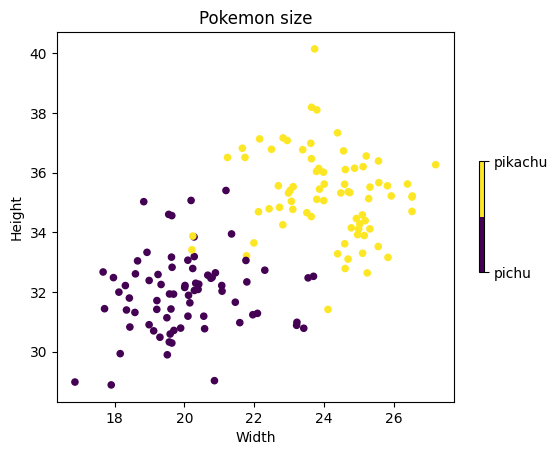

In [34]:
pok_to_plot (pokemon, "viridis", 2, [0,1], ["pichu", "pikachu"])

In [35]:
import csv

with open(".\\testpoints.txt") as file:
    reader = csv.reader(file)
    testpoints = list(reader)

print (testpoints)

[['Test points:'], ['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


The output doesn't look like smth I would like to work with, so I guess we need some data manipulations

In [36]:
testpoints.pop(0)
print (testpoints)

[['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


In [37]:
for obj in testpoints:
    obj[0] = obj[0][4:]
    obj[1] = obj[1][1:3]
    
print (testpoints)

[['25', '32'], ['24.2', '31'], ['22', '34'], ['20.5', '34']]


In [38]:
# They need some labels as well. 
# As we don't know who exactly they are yet, they will have label 0.5, which is numerically in between pichu and pikachu.

for obj in testpoints:
    obj.append(0.5)
print (testpoints)

[['25', '32', 0.5], ['24.2', '31', 0.5], ['22', '34', 0.5], ['20.5', '34', 0.5]]


Now we are going to add the lines with the new pokemons to the existing ndarray "pokemon". We'll create a new ndarray, called "new_pokemon"

In [39]:
testpoints_2d = np.array(testpoints, dtype=float)
print (testpoints_2d)

[[25.  32.   0.5]
 [24.2 31.   0.5]
 [22.  34.   0.5]
 [20.5 34.   0.5]]


In [40]:
new_pokemon = np.append(pokemon, testpoints_2d, axis = 0)

print(new_pokemon[-7:,:])

[[19.64060341 30.29155673  0.        ]
 [21.98995395 33.64590281  1.        ]
 [22.30210324 32.73237945  0.        ]
 [25.         32.          0.5       ]
 [24.2        31.          0.5       ]
 [22.         34.          0.5       ]
 [20.5        34.          0.5       ]]


Let's add the test data to the plot.

C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


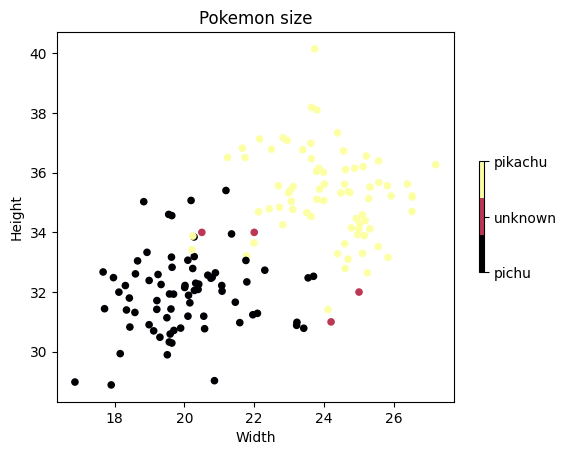

In [41]:
pok_to_plot (new_pokemon, "inferno", 3, [0, 0.5, 1], ["pichu", "unknown", "pikachu"])

### Classification.

In [42]:
def ordered_distances (point_to_sort, based_on_data=pokemon):
    """
    :param point_to_sort: list - a list containing pokemon-to-classify's parameters: list[0] is width, list[1] is height.
    :param based_on_data: default - pokemon; 2D array, or list of lists, each list having:
      list [0] as a width of a known pokemon, 
      list [1] - lenght of a known pokemon, 
      list [2] - the class label, 0 for pichu, 1 for pikachu 
    :return: list - a list of sorted distances.

    """
    distances = []
    import math
    
    x2 = float(point_to_sort[0])
    y2 = float(point_to_sort[1])

    for pokemons in based_on_data:
        x1 = pokemons[0]
        y1 = pokemons[1]
        lbl = pokemons[2]
        
        distance = math.sqrt((x2-x1)**2+(y2-y1)**2)
        
        #creating a sublist, where the distance to each known pokemon is stored with the labeled pokemon class
        item=[]
        item.append(distance)
        item.append(lbl)
        
        distances.append(item)

    import operator as opr
    distances_list = sorted (distances, key = opr.itemgetter(0))

    return distances_list   
    
    # fix description

In [43]:
def sorting_hat (parameters, distances_list):
    """ 
    Makes a guess based on one nearest neighbour. 
    
    """
    
    nearest_neighbour = distances_list[0][1]
    msg = f"The pokemon with parameters {parameters} looks like "
    if nearest_neighbour == 0:
        print (msg + "pichu")
    elif nearest_neighbour == 1:
        print (msg + "pikachu")
    else:
        print ("This should have never happened. You probably need some data cleaning.")


In [44]:
def decision_multi_neighbours (parameters, distances_list, num_neighbours=10, printing=True):
    """
    Classifies the pokemon based on num_neighbours number of neighbours. 
    
    """
   
    more_neighbours = []
    for i in range (num_neighbours):
        more_neighbours.append(distances_list[i][1])

    counter_pichu = 0
    counter_pikachu =0

    for pok in more_neighbours:
        if pok == 0:
            counter_pichu += 1
        elif pok == 1:
            counter_pikachu += 1
        else:
            print ("Address technical support")

    msg = f"Based on {num_neighbours} neighbours, the pokemon with the parameters {parameters} is classified as "
    if counter_pichu > counter_pikachu:
        if printing == True:
            print(f"{msg} pichu, \npossibility is {(counter_pichu/num_neighbours)*100:.1f}%\n\n")
        return 0
    elif counter_pikachu > counter_pichu:
        if printing == True:
            print (f"{msg} pikachu, \npossibility is {(counter_pikachu/num_neighbours)*100:.1f}%\n\n")
        return 1
    else:
        print ("We need more nearest neighbours to decide. Contact your Data Scientist.")

In [45]:
# creating a dictionary, where the key is the pokemon's coordinates and the value is the distance to all the classified points

def dictionary_maker (some_array, based_on_data=pokemon):
    poks_to_classify = {}
    for point in some_array:
        poks_to_classify[f"w={point[0]}, h={point[1]}"] = ordered_distances(point, based_on_data)  
    return poks_to_classify

poks_to_classify = dictionary_maker (testpoints)
print (poks_to_classify)

{'w=25, h=32': [[0.6829635758323602, 1.0], [0.8829834980050144, 1.0], [1.0623655711316322, 1.0], [1.1483506635878926, 1.0], [1.3042926733824602, 1.0], [1.405938571427235, 0.0], [1.421419952292384, 1.0], [1.4277016205320445, 1.0], [1.5334840155713694, 0.0], [1.6220435525527015, 1.0], [1.6694793213039807, 1.0], [1.9000844105707402, 1.0], [1.92323556047951, 1.0], [1.993526055542498, 0.0], [2.045814476254729, 0.0], [2.105658416262367, 0.0], [2.109813062390686, 1.0], [2.1399677267653545, 1.0], [2.163028256061473, 1.0], [2.2827901216880258, 1.0], [2.4001190857580688, 1.0], [2.4650990240276256, 1.0], [2.5869540314674673, 1.0], [2.795536907095536, 0.0], [2.876152825708887, 1.0], [2.994662999614875, 0.0], [3.0505182472152845, 1.0], [3.098060619590939, 1.0], [3.1342624251608395, 0.0], [3.1372167034396377, 1.0], [3.143582515448482, 1.0], [3.2260589926366356, 1.0], [3.2295550662804375, 0.0], [3.334126822030886, 1.0], [3.3433151410232775, 1.0], [3.3510903150659375, 1.0], [3.358857682258105, 1.0], [

Now we can finally classify our pokemons, using one- or multi- neighbours methods:

In [46]:
for key, value in poks_to_classify.items():
    sorting_hat (key, value)

The pokemon with parameters w=25, h=32 looks like pikachu
The pokemon with parameters w=24.2, h=31 looks like pikachu
The pokemon with parameters w=22, h=34 looks like pikachu
The pokemon with parameters w=20.5, h=34 looks like pichu


In [47]:
for key, value in poks_to_classify.items():
    decision_multi_neighbours (key, value)

Based on 10 neighbours, the pokemon with the parameters w=25, h=32 is classified as  pikachu, 
possibility is 80.0%


Based on 10 neighbours, the pokemon with the parameters w=24.2, h=31 is classified as  pichu, 
possibility is 60.0%


Based on 10 neighbours, the pokemon with the parameters w=22, h=34 is classified as  pikachu, 
possibility is 70.0%


Based on 10 neighbours, the pokemon with the parameters w=20.5, h=34 is classified as  pichu, 
possibility is 80.0%




Which shows that the pokemon with parameters w=24.2, h=31 is 10% probable is pichu, than pikachu, though its first nearest neighbour is pikachu.

## 2. User's input classification.

In [50]:
msg = "Please measure your pokemon's "
if_mistake = "Wrong input. Please try again."
def get_parameter (parameter_name, param_msg = msg, error_msg = if_mistake):    
    while True:    
        try:
            param = float(input(msg + parameter_name))
            return param
        except: 
            print (error_msg)
        else:
            break

In [51]:
def measure_your_pok (parameter_name, too_big=55, too_small=12):
    
    info = "Pichu is baby Pikachu. Your pokemon is  "
    param = 0
    while (param <= 0):
        param = get_parameter(parameter_name)
    check = False
    if param <= too_small:
        print (f"{info} too small to be Pichu. \n Is it probably Joltik? Joltik is also yellow.")
    elif param >= too_big:
        print (f"{info} too big to be Pikachu. \n Is it probably Raichu? Raichu is an adult Pikachu.")
    else:
        check = True
    if check == True:
        return param


In [52]:
parameters = []

width = measure_your_pok ("width")
parameters.append(width)
print(width)

25.0


In [53]:
height = measure_your_pok ("height")
parameters.append(height)
print (height)

26.0


In [54]:
print (parameters)

[25.0, 26.0]


Shall we visualize the user's pokemon?

In [55]:
lbld_parameters = []
lbld_parameters.append(width)
lbld_parameters.append(height)
lbld_parameters.append(0.5)

print (lbld_parameters)

[25.0, 26.0, 0.5]


C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


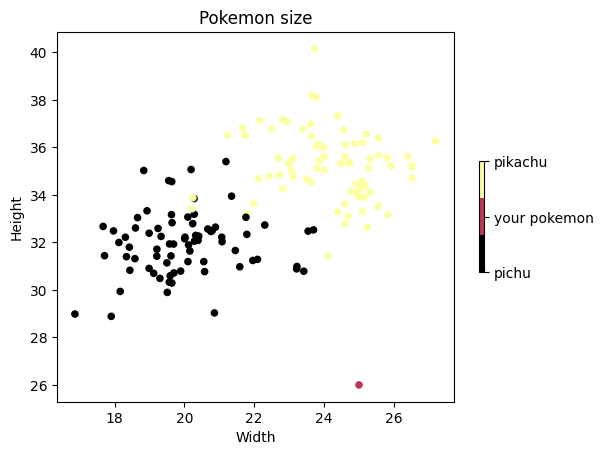

In [56]:
# np.vstack() stacks arrays in sequence vertically (row wise).

users_pokemon = np.vstack([pokemon, lbld_parameters])
pok_to_plot (users_pokemon, "inferno", 3, [0, 0.5, 1], ["pichu", "your pokemon", "pikachu"])

Let's classify it based on 10 nearest neighbours.

In [57]:
the_distances = ordered_distances (parameters)
print (the_distances)

[[5.041848520007892, 0.0], [5.130327979374235, 0.0], [5.201784021593777, 0.0], [5.294284481975989, 0.0], [5.490704096499152, 1.0], [6.033637848758921, 0.0], [6.0338323400928955, 0.0], [6.057920857907774, 0.0], [6.50441827778101, 0.0], [6.637310167529715, 0.0], [6.645508135049103, 1.0], [6.656272418715223, 0.0], [6.6770075813795335, 0.0], [6.732097425257146, 0.0], [6.799835159671477, 1.0], [6.834373826432395, 0.0], [6.865900590506415, 0.0], [6.945597594104891, 0.0], [7.003655465116786, 0.0], [7.09403089928846, 0.0], [7.095401436515537, 0.0], [7.10680626707142, 0.0], [7.111671755571641, 1.0], [7.137712885585104, 0.0], [7.192782623045292, 0.0], [7.209962290731564, 1.0], [7.2528325512417, 0.0], [7.254297155239925, 0.0], [7.300954642080002, 1.0], [7.308454818612567, 1.0], [7.357225663007791, 0.0], [7.433533595223687, 0.0], [7.526806117635665, 0.0], [7.528319032849724, 0.0], [7.546255444850864, 1.0], [7.62956893821827, 1.0], [7.635041562585308, 0.0], [7.648513675380507, 0.0], [7.650693643634

In [58]:
decision_multi_neighbours (parameters, the_distances)

Based on 10 neighbours, the pokemon with the parameters [25.0, 26.0] is classified as  pichu, 
possibility is 90.0%




0

## 3. Bonustasks

In [75]:
def predict_counter (test_dict, check_dict, printing_res=True, printing_ac=True):

    check_list = []
    for key, value in test_dict.items():
        predicted_label = decision_multi_neighbours (key, value, 11, False)
        if float(predicted_label) == check_dict[key]:
            check_list.append (True)
        else:
            check_list.append (False)
            if printing_res == True:
                print (f"Is predicted {float(predicted_label)} at {key} while actual label is {check_dict[key]}")

    true_predictions = check_list.count (True)
    total_predictions = len(check_list)
    accuracy = true_predictions / total_predictions

    if printing_ac == True:
        print (f"{accuracy = }")
    return accuracy

In [78]:
def bonus_flow(printing = False):
    if printing == True:
        print (f"\nHere we come!")
        
    pichus_shuffled = get_subarray(0)
    pikachus_shuffled = get_subarray(1)
    
    np.random.shuffle(pikachus_shuffled)
    np.random.shuffle(pichus_shuffled)
    if printing == True:
        print(f"pikachus_shuffled first 2 elements are \n{pikachus_shuffled[:2,]}")
        print(f"pichus_shuffled first 2 elements are \n{pichus_shuffled[:2,]}")

    train_pikachu = pikachus_shuffled[:50]
    train_pichu = pichus_shuffled[:50]
    train_data = np.vstack((train_pikachu, train_pichu))

    test_pikachu = pikachus_shuffled[50:]
    test_pichu = pichus_shuffled[50:]
    test_data = np.vstack((test_pikachu, test_pichu))

    test_poks_dict = dictionary_maker(test_data, train_data)

    same_keys_dictionary = {}
    for point in test_data:
        same_keys_dictionary[f"w={point[0]}, h={point[1]}"] = point[2] 
    
    accuracy = predict_counter(test_poks_dict, same_keys_dictionary, printing_ac=False)
    
    return accuracy

In [65]:
def get_subarray (lbl, orig_array=pokemon):
    #create a mask

    mask = orig_array[:, 2] == lbl
    subarray = orig_array[mask]
    
    return subarray

In [80]:
accuracy_list = []

for i in range (10):
    accuracy = bonus_flow(True)
    accuracy_list.append(accuracy)

print (accuracy_list)


Here we come!
pikachus_shuffled first 2 elements are 
[[23.10295249 34.77184698  1.        ]
 [22.94347431 37.07911596  1.        ]]
pichus_shuffled first 2 elements are 
[[18.16229127 29.93643755  0.        ]
 [20.32326991 32.29574812  0.        ]]
Is predicted 0.0 at w=21.98995394782501, h=33.64590281447322 while actual label is 1.0
Is predicted 1.0 at w=20.191281253428173, h=35.06966921830237 while actual label is 0.0
Is predicted 1.0 at w=21.19030359241021, h=35.40347944144049 while actual label is 0.0
Is predicted 1.0 at w=21.35018601896744, h=33.94708664610186 while actual label is 0.0
Is predicted 1.0 at w=23.6967469082275, h=32.52744160379351 while actual label is 0.0

Here we come!
pikachus_shuffled first 2 elements are 
[[25.11658671 36.20121875  1.        ]
 [21.98995395 33.64590281  1.        ]]
pichus_shuffled first 2 elements are 
[[18.43905922 30.82782242  0.        ]
 [17.71405642 31.44170391  0.        ]]
Is predicted 0.0 at w=20.216002852334192, h=33.41610156154373 w

In [82]:
mid_accuracy = sum(accuracy_list)/len(accuracy_list)
print (f"The average accuracy is {mid_accuracy:.2f}")

The average accuracy is 0.96


Text(0, 0.5, 'Result')

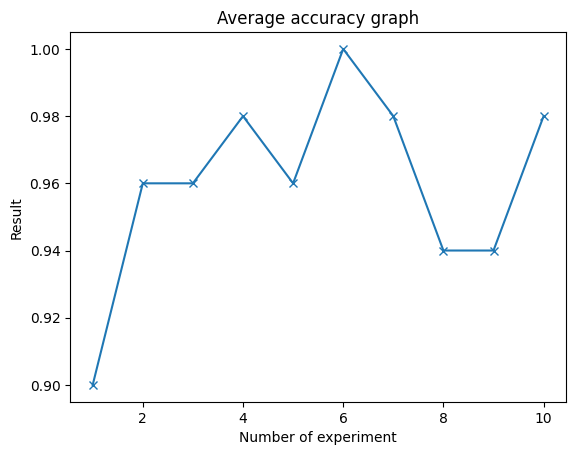

In [83]:
x = list (range(1,11))
plt.plot(x, accuracy_list, marker = "x")
plt.title ("Average accuracy graph")
plt.xlabel ("Number of experiment")
plt.ylabel ("Result")